In [118]:
pip install --upgrade pandas

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install --upgrade pandas-datareader

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas_ta

  Using cached pandas_ta-0.3.14b.tar.gz (115 kB)
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=36337541dc5140b0bb1a8ebbde4edb0aa69b80d767b87cd1e6ae0b5345e6a12f
  Stored in directory: /Users/haechan/Library/Caches/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas_datareader as pdr
import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("us_symbols.csv")

In [3]:
symbols = ['AAPL','MSFT','GOOGL','GOOG','AMZN','TSLA','JNJ','META','XOM','WMT','JPM','NVDA','HD','BAC','KO','PFE','DIS','MCD','CSCO','VZ','AMD','INTC','T','IBM','NFLX','C','BA','GE','F','FDX']

In [78]:
#define backtest range
START = datetime.datetime(2020, 1, 1)
END = datetime.datetime(2022, 10, 9)
YEARS = (END - START).days / 365.25

print(YEARS)

2.7707049965776864


In [379]:
#download data
START = datetime.datetime(2017, 1, 1)
END = datetime.datetime(2022, 10, 12)
price = pdr.get_data_yahoo('TSLA', START, END)

In [380]:
#remove columns
price = price.drop(['Volume', 'Adj Close'], 1)

price.tail()

<ipython-input-380-67c902b94223>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close
Date,,,,
2022-10-06,244.580002,235.350006,239.440002,238.130005
2022-10-07,234.570007,222.020004,233.940002,223.070007
2022-10-10,226.990005,218.360001,223.929993,222.960007
2022-10-11,225.750000,215.000000,220.949997,216.500000
2022-10-12,219.300003,211.509995,215.330002,217.240005


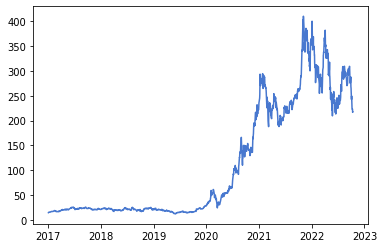

In [381]:
plt.style.use('seaborn-muted')
plt.plot(price.Close)
plt.show()

In [25]:
pip install pygooglenews --upgrade

  Using cached pygooglenews-0.1.2-py3-none-any.whl (10 kB)
  Using cached dateparser-0.7.6-py2.py3-none-any.whl (362 kB)
  Using cached feedparser-5.2.1.zip (1.2 MB)
    ERROR: Command errored out with exit status 1:
     command: /Users/haechan/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/pip-install-am10ko7o/feedparser_31ff37adb8b1475aa4032c05b1aaed29/setup.py'"'"'; __file__='"'"'/private/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/pip-install-am10ko7o/feedparser_31ff37adb8b1475aa4032c05b1aaed29/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/pip-pip-egg-info-s_ubrkc0
         cwd: /private/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/pip-install-am10ko7o/feedparser_31ff37adb8b1475aa4

In [27]:
from pygooglenews import GoogleNews
import datetime
gn = GoogleNews()
def get_titles(search):
  stories=[]
  search = gn.search(search, when = '2021-11-11')
  newsitem = search['entries']
  for item in newsitem:
    stories.append(item.title)
  return stories

ModuleNotFoundError: No module named 'pygooglenews'

In [10]:
#calculate benchmark return and balance

#define starting variables
STARTING_BALANCE = 10000
#daily return
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price

,High,Low,Open,Close,Return,Bench_Bal
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,1.000000,10000.000000
2019-01-02,39.712502,38.557499,38.722500,39.480000,1.001141,10011.410718
2019-01-03,36.430000,35.500000,35.994999,35.547501,0.900393,9014.200424
2019-01-04,37.137501,35.950001,36.132500,37.064999,1.042689,9399.010355
2019-01-07,37.207500,36.474998,37.174999,36.982498,0.997774,9378.089738
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,1.022975,45728.412717
2021-12-28,181.330002,178.529999,180.160004,179.289993,0.994233,45464.685443
2021-12-29,180.630005,178.139999,179.330002,179.380005,1.000502,45487.510748


In [11]:
STARTING_BALANCE = 10000
#daily return
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)
bench_dd

-31.43

In [12]:
#calculate MACD
exp1 = price.Close.ewm(span = 12, adjust=False).mean()
exp2 = price.Close.ewm(span = 26, adjust=False).mean()

macd = exp1 - exp2
signal = macd.ewm(span = 9, adjust=False).mean()

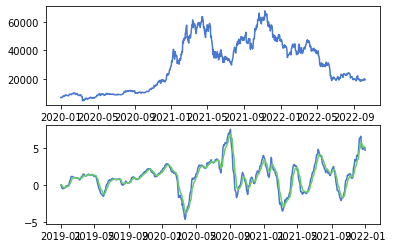

In [371]:
plt.figure()

#create subplot for price data
plt.subplot(211)
plt.plot(price.Close)

#create subplot for MACD
plt.subplot(212)
plt.plot(macd)
plt.plot(signal) 

# plt.subplot(212)
# plt.plot(price['RSI_14'])

#show plot
plt.show()

In [14]:
#add column for entries
price['Long'] = macd > signal

price


,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long
Date,,,,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,1.000000,10000.000000,10000.000000,0.000000,False
2019-01-02,39.712502,38.557499,38.722500,39.480000,1.001141,10011.410718,10011.410718,0.000000,True
2019-01-03,36.430000,35.500000,35.994999,35.547501,0.900393,9014.200424,10011.410718,-997.210294,False
2019-01-04,37.137501,35.950001,36.132500,37.064999,1.042689,9399.010355,10011.410718,-612.400363,False
2019-01-07,37.207500,36.474998,37.174999,36.982498,0.997774,9378.089738,10011.410718,-633.320980,False
...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,1.022975,45728.412717,45728.412717,0.000000,False
2021-12-28,181.330002,178.529999,180.160004,179.289993,0.994233,45464.685443,45728.412717,-263.727275,False
2021-12-29,180.630005,178.139999,179.330002,179.380005,1.000502,45487.510748,45728.412717,-240.901969,False


In [15]:
#calculate system return and balance

#if Long then price return, and 1 otherwise
price['Sys_Ret'] = np.where((price.Long.shift(1) == True), price.Return, 1)

price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price

,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,1.000000,10000.000000,10000.000000,0.000000,False,1.000000,10000.000000
2019-01-02,39.712502,38.557499,38.722500,39.480000,1.001141,10011.410718,10011.410718,0.000000,True,1.000000,10000.000000
2019-01-03,36.430000,35.500000,35.994999,35.547501,0.900393,9014.200424,10011.410718,-997.210294,False,0.900393,9003.926297
2019-01-04,37.137501,35.950001,36.132500,37.064999,1.042689,9399.010355,10011.410718,-612.400363,False,1.000000,9003.926297
2019-01-07,37.207500,36.474998,37.174999,36.982498,0.997774,9378.089738,10011.410718,-633.320980,False,1.000000,9003.926297
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,1.022975,45728.412717,45728.412717,0.000000,False,1.000000,31849.164363
2021-12-28,181.330002,178.529999,180.160004,179.289993,0.994233,45464.685443,45728.412717,-263.727275,False,1.000000,31849.164363
2021-12-29,180.630005,178.139999,179.330002,179.380005,1.000502,45487.510748,45728.412717,-240.901969,False,1.000000,31849.164363


In [16]:
# profit calculation for MACD
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
for i in range(1, len(price)):
    if price['Long'][i] == True:
        if price['Long'][i-1] ==False:
            buy = price['Close'][i]
            numb = money//buy
            money-=numb*buy
        else:
            asset.append(money + (price['Open'][i]*numb))
            continue
    else:
        if price['Long'][i-1] == True:
            sell = price['Open'][i]
            money += (sell)*numb
            exchange +=1
            if sell>buy:
                wins +=1
            numb=0
        else: 
            
            asset.append(money + (price['Close'][i]*numb))
            continue
    asset.append(money + (price['Open'][i]*numb))
price['apple']=asset


In [17]:
asset

[10000,
 9808.352577209473,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9118.294845581055,
 9009.0198097229,
 9074.819522857666,
 9268.694702148438,
 9204.657417297363,
 9071.881843566895,
 9069.532238006592,
 9150.019451141357,
 9168.23180770874,
 9195.257202148438,
 9606.507202148438,
 9774.532238006592,
 9824.470096588135,
 9850.907417297363,
 10171.094738006592,
 10276.256843566895,
 10144.069343566895,
 9943.732524871826,
 10064.757381439209,
 10008.94506072998,
 10084.732166290283,
 9986.032596588135,
 10076.507202148438,
 9986.032596588135,
 10072.982345581055,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10108.819881439209,
 10058.087177276611,
 10183.5246772

In [162]:
def macd_strategy(symbol, start, end):
    #get data
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)

    #macd calculations
    exp1 = price.Close.ewm(span = 12, adjust=False).mean()
    exp2 = price.Close.ewm(span = 26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span = 9, adjust=False).mean()

    #add column for entries
    price['Long'] = macd > signal
    # profit calculation for MACD
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    peak = 0
    drawdowns = [0]
    difference = []
    for i in range(1, len(price)):
        
        if price['Long'][i] == True:
            
            if numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
            else:
                asset.append(money + (price['Close'][i]*numb))
                drawdowns.append(((money + (price['Close'][i]*numb))-max(asset))/max(asset))
                continue
        else:
           
            if numb!=0 : 
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                difference.append(sell-buy)
                numb=0
            else: 
                
                asset.append(money + (price['Close'][i]*numb))
                drawdowns.append(((money + (price['Close'][i]*numb))-max(asset))/max(asset))
                continue
        
        asset.append(money + (price['Close'][i]*numb))
        drawdowns.append(((money + (price['Close'][i]*numb))-max(asset))/max(asset))
    price['MACD']=asset
    price['DD']=drawdowns

    STARTING_BALANCE = 10000
    #daily return
    price['Return'] = price.Close / price.Close.shift(1)
    price.Return.iat[0] = 1
    price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()
    #calculate drawdown
    price['Bench_Peak'] = price.Bench_Bal.cummax()
    price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

    bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)
    print("win rate:", wins/exchange)
    print("strategy maximym drawdown", min(price['DD']))
    print("benchmarck maximum drawdwon", bench_dd)
    return price
    
    

In [168]:
start =datetime.datetime(2021, 1, 1)
end= datetime.datetime(2022, 10, 21)
symbol = 'NFLX'
result = macd_strategy(symbol, start, end)
result

win rate: 0.3125
strategy maximym drawdown -0.3407911426850139
benchmarck maximum drawdwon -75.95


<ipython-input-162-00c98d237322>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close,Long,MACD,DD,Return,Bench_Bal,Bench_Peak,Bench_DD
Date,,,,,,,,,,,
2020-12-31,545.500000,523.150024,525.530029,540.729980,False,10000.000000,0.000000,1.000000,10000.000000,10000.000000,0.000000
2021-01-04,540.799988,515.090027,539.000000,522.859985,False,10000.000000,0.000000,0.966952,9669.520911,10000.000000,-330.479089
2021-01-05,526.780029,515.890015,521.549988,520.799988,False,10000.000000,0.000000,0.996060,9631.424308,10000.000000,-368.575692
2021-01-06,513.099976,499.500000,511.970001,500.489990,False,10000.000000,0.000000,0.961002,9255.820989,10000.000000,-744.179011
2021-01-07,516.440002,506.420013,508.279999,508.890015,False,10000.000000,0.000000,1.016784,9411.166997,10000.000000,-588.833003
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,249.919998,234.399994,234.410004,245.100006,True,8846.986710,-0.163812,1.065652,4532.761544,12791.781988,-8259.020444
2022-10-18,250.369995,237.729996,249.800003,240.860001,True,8694.346512,-0.178240,0.982701,4454.348923,12791.781988,-8337.433065
2022-10-19,279.299988,262.660004,265.000000,272.380005,True,9829.066666,-0.070990,1.130864,5037.264711,12791.781988,-7754.517277


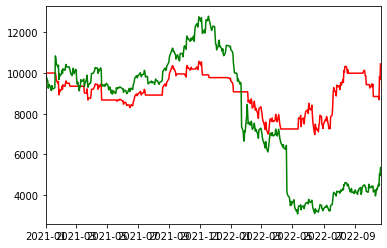

In [169]:
plt.plot(result['MACD'],c='r')
plt.plot(result['Bench_Bal'], c='g')
plt.xlim(datetime.datetime(2021, 1, 1),datetime.datetime(2022, 10, 21))
plt.show()

In [47]:

def macd_breakout_strategy(symbol, start, end,parameter):
    #get data
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)

    #macd calculations
    exp1 = price.Close.ewm(span = 12, adjust=False).mean()
    exp2 = price.Close.ewm(span = 26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span = 9, adjust=False).mean()

    #add column for entries
    price['Long'] = macd > signal
    # profit calculation for MACD
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    difference = []
    vol = False
    mac = False
    vols = 0
    macs = 0
    max_win = 0
    max_lose = 0 
    k=parameter
    for i in range(1, len(price)):
        volatility = abs(price['High'][i-1]-price['Low'][i-1])
        
        if price['Long'][i] == True :
            
            if numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
                mac=True
                macs+=1
            else:
                # if price['Low'][i]<price['Open'][i]-(volatility*k*2):
                #     sell = price['Open'][i]-(volatility*k*2)
                #     money += (sell)*numb
                #     exchange +=1
                #     if sell>buy:
                #         wins +=1
                #     difference.append(sell-buy)
                #     numb=0
                # if price['Close'][i]<buy*0.9:
                #     sell = price['Close'][i]
                #     money += (sell)*numb
                #     exchange +=1
                #     if sell>buy:
                #         wins +=1
                #     difference.append(sell-buy)
                #     numb=0
                
                asset.append(money + (price['Open'][i]*numb))
                continue
        elif price['High'][i]>price['Open'][i]+(volatility*k):
            if numb==0:
                buy = price['Open'][i] +(volatility*k)
                numb = money//buy
                money-=numb*buy
                vol = True
                vols+=1
                
            else:
                
                asset.append(money + (price['Close'][i]*numb))
                continue
        # elif price['Low'][i]<price['Open'][i]-(volatility*k*0.5):
           
        #     if numb!=0 : 
        #         sell = price['Open'][i]
        #         money += (sell)*numb
        #         exchange +=1
        #         if sell>buy:
        #             wins +=1
        #         difference.append(sell/buy)
        #         numb=0
        #     else: 
                
        #         asset.append(money + (price['Close'][i]*numb))
        #         continue
            
        else:
           
            if numb!=0 and price['Long'][i-1] == True: 
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                difference.append(sell/buy)
                numb=0
            else: 
                
                asset.append(money + (price['Close'][i]*numb))
                continue
        asset.append(money + (price['Close'][i]*numb))
    price['MACD_breakout']=asset
    return price
    
    

In [61]:
start =datetime.datetime(2021, 1, 1)
end= datetime.datetime(2022, 10, 14)
symbol = 'KRWUSD=X'
macd_breakout = macd_breakout_strategy(symbol, start, end,0.3)
macd_breakout

<ipython-input-47-86495f3a9d09>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close,Long,MACD_breakout
Date,,,,,,
2020-12-31,0.000924,0.000918,0.000920,0.000920,False,10000.000000
2021-01-01,0.000923,0.000919,0.000923,0.000922,True,10000.000000
2021-01-04,0.000927,0.000920,0.000922,0.000922,True,9999.262584
2021-01-05,0.000924,0.000918,0.000921,0.000920,True,9991.157320
2021-01-06,0.000923,0.000919,0.000921,0.000920,True,9990.788612
...,...,...,...,...,...,...
2022-10-09,0.000706,0.000699,0.000706,0.000706,True,7962.083768
2022-10-10,0.000700,0.000695,0.000700,0.000700,True,7893.129150
2022-10-11,0.000703,0.000697,0.000699,0.000699,True,7879.613192


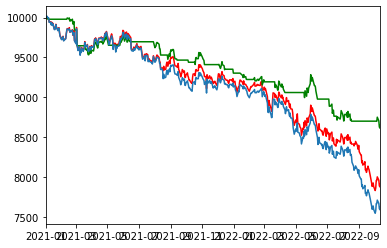

In [62]:

plt.plot(macd_breakout['MACD_breakout'],c='r')
plt.plot(result['MACD'],c='g')
plt.plot(result['Close']*(10000/result['Close'][0]))
plt.xlim(datetime.datetime(2021, 1, 1),datetime.datetime(2022, 10, 12))
plt.show()

In [8]:
vix = pdr.get_data_yahoo("^VIX", start, end)
vix

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,14.070000,12.850000,14.070000,12.850000,0,12.850000
2017-01-04,12.800000,11.630000,12.780000,11.850000,0,11.850000
2017-01-05,12.090000,11.400000,11.960000,11.670000,0,11.670000
2017-01-06,11.740000,10.980000,11.700000,11.320000,0,11.320000
2017-01-09,12.080000,11.460000,11.710000,11.560000,0,11.560000
...,...,...,...,...,...,...
2022-10-10,33.990002,32.049999,32.930000,32.450001,0,32.450001
2022-10-11,34.430000,32.450001,33.560001,33.630001,0,33.630001
2022-10-12,34.529999,33.110001,33.540001,33.570000,0,33.570000


In [172]:

def vix_strategy(symbol, start, end,parameter):
    #get data
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)
    vix = pdr.get_data_yahoo("^VIX", start, end)

    #macd calculations
    exp1 = price.Close.ewm(span = 12, adjust=False).mean()
    exp2 = price.Close.ewm(span = 26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span = 9, adjust=False).mean()

    #add column for entries
    price['Long'] = macd > signal
    # profit calculation for MACD
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    difference = []

    
    k=parameter
    for i in range(1, len(price)):
        volatility = abs(price['High'][i-1]-price['Low'][i-1])
        
        if vix['Close'][i] > 35 :
            
            if numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
            else:
                
                
                asset.append(money + (price['Open'][i]*numb))
                continue

            
        elif vix['Close'][i]<20:
           
            if numb!=0 : 
                sell = price['Open'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                difference.append(sell-buy)
                numb=0
            else: 
                
                asset.append(money + (price['Close'][i]*numb))
                continue
        else:
            asset.append(money + (price['Close'][i]*numb))
            continue
        asset.append(money + (price['Open'][i]*numb))
    price['MACD_breakout']=asset
    return price
    
    

In [173]:
start =datetime.datetime(1992, 1, 1)
end= datetime.datetime(2022, 10, 12)
symbol = '^GSPC'
vix = vix_strategy(symbol, start, end,0.3)
vix

<ipython-input-172-1abf549dbb86>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close,Long,MACD_breakout
Date,,,,,,
1991-12-31,418.320007,412.730011,415.140015,417.089996,False,10000.000000
1992-01-02,417.269989,411.040009,417.029999,417.260010,True,10000.000000
1992-01-03,419.790009,416.160004,417.269989,419.339996,True,10000.000000
1992-01-06,419.440002,416.920013,419.309998,417.959991,True,10000.000000
1992-01-07,417.959991,415.200012,417.959991,417.399994,True,10000.000000
...,...,...,...,...,...,...
2022-10-06,3797.929932,3739.219971,3771.969971,3744.520020,True,28408.037659
2022-10-07,3706.739990,3620.729980,3706.739990,3639.659912,True,28408.037659
2022-10-10,3652.169922,3588.100098,3647.510010,3612.389893,True,28408.037659


In [11]:
buy_days=20
sell_days =40
price["highest"]=(price["Close"].rolling(window=buy_days).max()).shift()
price["Buy"]=np.where(price["Close"].shift()>price["highest"].shift(),1,0)
price["lowest"]=(price["Close"].rolling(window=sell_days).min()).shift()
price["Sell"]=np.where(price["Close"].shift()<price["lowest"].shift(),1,0)
price

NameError: name 'price' is not defined

In [63]:


def donchian_strategy(symbol, start, end, buy_days, sell_days):
    #get data
    data=yf.download(symbol)
    data=data.loc['2018-01-01':'2022-10-12']
    price=data.Close.to_frame()
    price["highest"]=(price["Close"].rolling(window=buy_days).max()).shift()
    price["Buy"]=np.where(price["Close"].shift()>price["highest"].shift(),1,0)
    price["lowest"]=(price["Close"].rolling(window=sell_days).min()).shift()
    price["Sell"]=np.where(price["Close"].shift()<price["lowest"].shift(),1,0)
    #macd calculations
    # exp1 = price.Close.ewm(span = 12, adjust=False).mean()
    # exp2 = price.Close.ewm(span = 26, adjust=False).mean()
    # macd = exp1 - exp2
    # signal = macd.ewm(span = 9, adjust=False).mean()

    #add column for entries
    # price['Long'] = macd > signal
    # profit calculation for MACD
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    difference = []
    for i in range(1, len(price)):
        
        if price.Buy.iloc[i]:
            
            if numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
                asset.append(money + (price['Close'][i]*numb))
            else:
                asset.append(money + (price['Close'][i]*numb))
                
        elif price.Sell.iloc[i]:
           
            if numb!=0 : 
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                difference.append(sell-buy)
                numb=0
                asset.append(money + (price['Close'][i]*numb))
            else: 
                
                asset.append(money + (price['Close'][i]*numb))
                
        else:
            asset.append(money + (price['Close'][i]*numb))
    price['MACD']=asset
    return price
    
    

In [66]:
import yfinance as yf
start =datetime.datetime(2020, 1, 1)
end= datetime.datetime(2022, 10, 12)
symbol = 'KRWUSD=X'
donchian = donchian_strategy(symbol, start, end, 20, 40)
donchian

[*********************100%***********************]  1 of 1 completed


,Close,highest,Buy,lowest,Sell,MACD
Date,,,,,,
2018-01-01 00:00:00+00:00,0.000938,NaN,0,NaN,0,10000.00000
2018-01-02 00:00:00+00:00,0.000939,NaN,0,NaN,0,10000.00000
2018-01-03 00:00:00+00:00,0.000941,NaN,0,NaN,0,10000.00000
2018-01-04 00:00:00+00:00,0.000940,NaN,0,NaN,0,10000.00000
2018-01-05 00:00:00+00:00,0.000942,NaN,0,NaN,0,10000.00000
...,...,...,...,...,...,...
2022-10-06 00:00:00+01:00,0.000706,0.000728,0,0.000695,0,8370.60823
2022-10-07 00:00:00+01:00,0.000710,0.000727,0,0.000695,0,8370.60823
2022-10-10 00:00:00+01:00,0.000706,0.000727,0,0.000695,0,8370.60823


In [289]:
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.1.2 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.1.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [87]:
#calculate RSI

import pandas as pd
import pandas_ta as ta
# Load the data
#df = pd.read_csv('us_symbols.csv', header=0).set_index(['period'])
# Calculate the RSI via pandas_ta
rsi = price.ta.rsi(close='Close', length=14, append=True, signal_indicators = True, xa=70, xb=30)

from xmlrpc.client import Boolean


RSIs=[]
for i in price['RSI_14_B_30']:
    RSIs.append(Boolean(i))
RSI= pd.Series(RSIs)
RSI

0       False
1       False
2       False
3       False
4       False
        ...  
1007    False
1008    False
1009    False
1010    False
1011    False
Length: 1012, dtype: bool

In [88]:
price

,High,Low,Open,Close,RSI_14,RSI_14_A_70,RSI_14_B_30
Date,,,,,,,
2019-12-31,7335.290039,7169.777832,7294.438965,7193.599121,NaN,0,0
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,NaN,0,0
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,NaN,0,0
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,NaN,0,0
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,NaN,0,0
...,...,...,...,...,...,...,...
2022-10-03,19653.542969,19025.226562,19044.068359,19623.580078,49.247803,0,0
2022-10-04,20380.343750,19523.839844,19623.583984,20336.843750,55.791524,0,0
2022-10-05,20343.748047,19801.800781,20335.900391,20160.716797,53.942011,0,0


In [91]:
price['RSI_14_A_70'][15] == 1

True

In [14]:
# profit calculation for RSI
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
rsi_index = []
for i in range(1, len(price)):
    if price['RSI_14_B_30'][i]==1 and numb==0:
        rsi_index.append(i)
        buy = price['Open'][i]
        numb = money//buy
        money-=numb*buy
        asset.append(money + (price['Open'][i]*numb))
        continue

    if price['RSI_14_A_70'][i]==1 and numb !=0:
        sell = price['Open'][i]
        money += (sell)*numb
        exchange +=1
        if sell>buy:
            wins +=1
        numb=0
        asset.append(money + (price['Open'][i]*numb))
        continue
    asset.append(money + (price['Close'][i]*numb))





NameError: name 'price' is not defined

In [34]:
len(asset)

758

In [35]:
price['RSI_asset']=asset

In [36]:
price['RSI_asset'][-1]

16905.082717895508

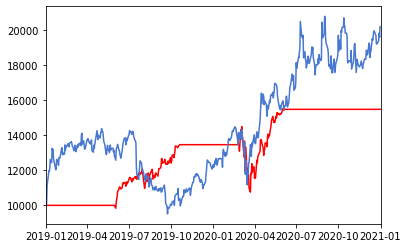

In [38]:

plt.plot(price['RSI_asset'],c='r')
plt.plot(result['Close']*(10000/result['Close'][0]))
plt.xlim(datetime.datetime(2019, 1, 1),datetime.datetime(2021, 1, 1))
plt.show()

In [67]:
import pandas as pd
import pandas_ta as ta
from xmlrpc.client import Boolean
def rsi_strategy(symbol, start, end):
    #get data
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)
    rsi = price.ta.rsi(close='Close', length=14, append=True, signal_indicators = True, xa=70, xb=30)
    RSIs=[]
    for i in price['RSI_14_B_30']:
        RSIs.append(Boolean(i))
    RSI= pd.Series(RSIs)
    # profit calculation for RSI
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    rsi_index = []
    for i in range(1, len(price)):
        if price['RSI_14_B_30'][i]==1 and numb==0:
            rsi_index.append(i)
            buy = price['Close'][i]
            numb = money//buy
            money-=numb*buy
            asset.append(money + (price['Close'][i]*numb))
            continue

        if price['RSI_14_A_70'][i]==1 and numb !=0:
            sell = price['Close'][i]
            money += (sell)*numb
            exchange +=1
            if sell>buy:
                wins +=1
            numb=0
            asset.append(money + (price['Close'][i]*numb))
            continue
            
        asset.append(money + (price['Close'][i]*numb))
    price['RSI_strategy'] = asset
    return price



In [68]:
start =datetime.datetime(2017, 1, 1)
end= datetime.datetime(2022, 10, 12)
result_rsi = rsi_strategy('TSLA', start, end)
result_rsi

<ipython-input-67-9158b8c72060>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close,RSI_14,RSI_14_A_70,RSI_14_B_30,RSI_strategy
Date,,,,,,,,
2017-01-03,14.688667,14.064000,14.324000,14.466000,NaN,0,0,10000.000000
2017-01-04,15.200000,14.287333,14.316667,15.132667,NaN,0,0,10000.000000
2017-01-05,15.165333,14.796667,15.094667,15.116667,NaN,0,0,10000.000000
2017-01-06,15.354000,15.030000,15.128667,15.267333,NaN,0,0,10000.000000
2017-01-09,15.461333,15.200000,15.264667,15.418667,NaN,0,0,10000.000000
...,...,...,...,...,...,...,...,...
2022-10-06,244.580002,235.350006,239.440002,238.130005,31.129759,0,0,39302.721655
2022-10-07,234.570007,222.020004,233.940002,223.070007,26.998162,0,1,39302.721655
2022-10-10,226.990005,218.360001,223.929993,222.960007,26.970006,0,1,39283.361547


In [87]:
# profit calculation for volatility breakout strategy
def breakout_strategy(symbol, start, end,k):
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    profit=0
    for i in range( len(price)-1):
        volatility = abs(price['High'][i-1]-price['Low'][i-1])
        k=0.3
        if price['High'][i]>price['Open'][i]+(volatility*k):
            buy = price['Open'][i]+(volatility*k)
            numb = money//buy
            sell = price['Close'][i]
            profit = (sell-buy)*numb
            exchange +=1
            if sell>buy:
                wins +=1

        numb=0
        money +=profit
        
        profit=0
        asset.append(money)
    price['breakout'] = asset
    return price



In [96]:
# profit calculation for volatility breakout strategy
def breakout_macd_strategy(symbol, start, end):
    #get data
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)

    #macd calculations
    exp1 = price.Close.ewm(span = 12, adjust=False).mean()
    exp2 = price.Close.ewm(span = 26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span = 9, adjust=False).mean()

    #add column for entries
    price['Long'] = macd > signal

    exp3 = price.Close.ewm(span = 200, adjust=False).mean()
    price['ema200'] = exp3  
    
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    profit=0
    for i in range( len(price)-1):
        volatility = abs(price['High'][i-1]-price['Low'][i-1])
        # if price['ema200'][i] >0:
        #     k=0.3
        # else:
        #     k=0.5
        k=0.1
        if price['High'][i]>price['Open'][i]+(volatility*k):
            buy = price['Open'][i]+(volatility*k)
            numb = money//buy
            sell = price['Close'][i]
            profit = (sell-buy)*numb
            exchange +=1
            if sell>buy:
                wins +=1

        numb=0
        money +=profit
        
        profit=0
        asset.append(money)
    price['breakout'] = asset
    return price



In [97]:
breakout = breakout_macd_strategy('AAPL', '2019-01-01', '2022-10-19')
breakout

<ipython-input-96-09eb364dc3f7>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close,Long,ema200,breakout
Date,,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,False,39.435001,10000.000000
2019-01-02,39.712502,38.557499,38.722500,39.480000,True,39.435449,10000.000000
2019-01-03,36.430000,35.500000,35.994999,35.547501,False,39.396763,10176.173390
2019-01-04,37.137501,35.950001,36.132500,37.064999,False,39.373561,10017.970789
2019-01-07,37.207500,36.474998,37.174999,36.982498,False,39.349770,10249.672486
...,...,...,...,...,...,...,...
2022-10-13,143.589996,134.369995,134.990005,142.990005,False,153.873384,14584.336247
2022-10-14,144.520004,138.190002,144.309998,138.380005,False,153.719221,15416.796280
2022-10-17,142.899994,140.270004,141.070007,142.410004,True,153.606691,15416.796280


In [91]:


def bollinger_band_strategy(symbol, start, end):
    def get_sma(prices, rate):
        return prices.rolling(rate).mean()
    price = pdr.DataReader(symbol, 'yahoo', start, end)
    closing_prices = price['Close'] 
    ma = get_sma(closing_prices, 20)
    def get_bollinger_bands(prices, rate=20):
        sma = get_sma(prices, rate)
        std = prices.rolling(rate).std()
        bollinger_up = sma + std * 2 # Calculate top band
        bollinger_down = sma - std * 2 # Calculate bottom band
        return bollinger_up, bollinger_down

    bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

    # backtrading for bollinger bands
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    bollinger_up, bollinger_down = get_bollinger_bands(price['Close'])

    for i in range(1, len(price)):
        if bollinger_down[i]:
            if price['Close'][i] < bollinger_down[i] and numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
            elif price['Close'][i] > bollinger_up[i] and numb!=0:
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                numb=0
            else:
                asset.append(money + (price['Close'][i]*numb))
                continue
        else:
            asset.append(money + (price['Close'][i]*numb))
            continue
        asset.append(money + (price['Close'][i]*numb))

    price['Bollinger'] = asset
    return price



In [128]:
def MACD_BREAKOUT_STRATEGY(symbol, start, end, k):
    #get data
    price = pdr.get_data_yahoo(symbol, start, end)
    price = price.drop(['Volume', 'Adj Close'], 1)

    #macd calculations
    exp1 = price.Close.ewm(span = 12, adjust=False).mean()
    exp2 = price.Close.ewm(span = 26, adjust=False).mean()
    exp3 = price.Close.ewm(span = 26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span = 9, adjust=False).mean()

    #add column for entries
    price['Long'] = macd > signal
    price['200ema']=exp3
    # profit calculation for MACD
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    difference = []
    for i in range(1, len(price)):
        
        if price['Long'][i] == True:
            
            if numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
            else:
                asset.append(money + (price['Close'][i]*numb))
                continue
        elif price['High'][i]>price['Open'][i]+(price['High'][i-1]-price['Low'][i-1] )*k :
            if numb==0:
                buy = price['Open'][i]+(price['High'][i-1]-price['Low'][i-1] )*k
                numb = money//buy
                money-=numb*buy
            else:
                asset.append(money + (price['Close'][i]*numb))
                continue
        else:
           
            if numb!=0 : 
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                difference.append(sell-buy)
                numb=0
            else: 
                
                asset.append(money + (price['Close'][i]*numb))
                continue
        asset.append(money + (price['Close'][i]*numb))
    price['MACD']=asset
    return price

In [125]:
start =datetime.datetime(2017, 1, 1)
end= datetime.datetime(2022, 10, 12)
symbol = 'NFLX'
result = MACD_BREAKOUT_STRATEGY(symbol, start, end, 0.3)
result


<ipython-input-124-4a36801c5a98>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


,High,Low,Open,Close,Long,200ema,MACD
Date,,,,,,,
2017-01-03,128.190002,124.309998,124.959999,127.489998,False,127.489998,10000.000000
2017-01-04,130.169998,126.550003,127.489998,129.410004,True,127.632221,10000.000000
2017-01-05,132.750000,128.899994,129.220001,131.809998,True,127.941685,10184.799530
2017-01-06,133.880005,129.809998,132.080002,131.070007,True,128.173413,10127.820282
2017-01-09,131.990005,129.889999,131.479996,130.949997,True,128.379086,10118.579483
...,...,...,...,...,...,...,...
2022-10-06,244.279999,233.910004,236.679993,240.020004,True,233.953421,17991.897507
2022-10-07,237.330002,224.279999,235.770004,224.750000,False,233.271686,16861.917191
2022-10-10,233.830002,224.229996,225.639999,229.979996,False,233.027858,16861.917191


In [130]:
# here! we combine all the results
start =datetime.datetime(2021, 1, 1)
end= datetime.datetime(2022, 10, 12)
symbol = 'AAPL'

price = pdr.get_data_yahoo(symbol, start, end)
result_macd= macd_strategy(symbol, start, end)
result_rsi = rsi_strategy(symbol, start, end)
result_bollinger = bollinger_band_strategy(symbol, start,end)
result_breakout = breakout_strategy(symbol, start, end,0.5)
result = MACD_BREAKOUT_STRATEGY(symbol, start, end, 0.5)
#result_macd_breakout = macd_breakout_strategy(symbol, start, end, 0.3)

<ipython-input-33-2a1f89e5b9ee>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)
<ipython-input-67-9158b8c72060>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)
<ipython-input-87-dd364ebb8bce>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)
<ipython-input-128-9563ad3b969e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  price = price.drop(['Volume', 'Adj Close'], 1)


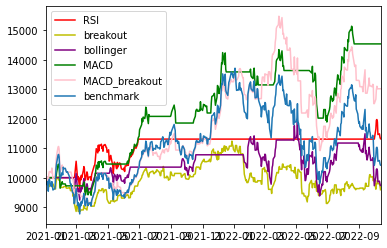

In [131]:
#visualize
plt.plot(result_rsi['RSI_strategy'],c='r', label="RSI")
plt.plot(result_breakout['breakout'],c='y', label = "breakout")
plt.plot(result_bollinger['Bollinger'], c = 'purple', label = "bollinger")
plt.plot(result_macd['MACD'],c='g', label = 'MACD')
plt.plot(result['MACD'], c='pink', label = 'MACD_breakout')
plt.plot(result_rsi['Close']*(10000/result_rsi['Close'][0]), label = "benchmark")
plt.xlim(datetime.datetime(2021, 1, 1),datetime.datetime(2022, 10, 12))
plt.legend()
plt.show()

In [174]:
from random import randrange
from datetime import timedelta

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

In [177]:
from datetime import datetime

d1 = datetime.strptime('1/1/2008', '%m/%d/%Y')
d2 = datetime.strptime('1/1/2009', '%m/%d/%Y')

print(random_date(d1, d2))

2008-04-28 16:36:33


In [222]:

# Python3 code to demonstrate working of
# Random K dates in Range
# Using randrange() + timedelta() + loop
from datetime import date, timedelta
import random
  
# initializing dates ranges 
test_date1, test_date2 = date(2015, 6, 3), date(2015, 7, 1)
  
# printing dates 
print("The original range : " + str(test_date1) + " " + str(test_date2))
  
# initializing K
K = 7
  
# getting days between dates
dates_bet = test_date2 - test_date1
total_days = dates_bet.days
  
res = []
# for idx in range(K):
#     random.seed(a=None)
      
#     # getting random days
#     randay = random.randrange(total_days)
      
#     # getting random dates 
#     res.append(test_date1 + timedelta(days=randay))
random.seed(a=None)
randay = random.randrange(total_days)
day = test_date1 + timedelta(days=randay)
# printing 
#yee = res[0]
endDate = day.replace(day.year + 1)
print(endDate)

The original range : 2015-06-03 2015-07-01
2016-06-27


In [218]:
from datetime import date
startDate = date(2012, 12, 21)

# reconstruct date fully
#endDate = date(startDate.year + 1, startDate.month, startDate.day)
# replace year only
endDate = startDate.replace(startDate.year + 1)
endDate

datetime.date(2013, 12, 21)

In [208]:
df = pd.read_csv('constituents_csv.csv')
df['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
500     XYL
501     YUM
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [215]:
import random
df = pd.read_csv('constituents_csv.csv')
random_number = random.randint(1,500)
df['Symbol'][random_number]

'APD'

In [41]:
exp3 = price.Close.ewm(span = 200, adjust=False).mean()
price['ema200'] = exp3
price

,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,RSI_14,RSI_14_A_70,RSI_14_B_30,Long,Sys_Ret,Sys_Bal,apple,ema200
Date,,,,,,,,,,,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,1.000000,10000.000000,10000.000000,0.000000,NaN,0,0,False,1.000000,10000.000000,10000.000000,39.435001
2019-01-02,39.712502,38.557499,38.722500,39.480000,1.001141,10011.410718,10011.410718,0.000000,NaN,0,0,True,1.000000,10000.000000,9808.352577,39.435449
2019-01-03,36.430000,35.500000,35.994999,35.547501,0.900393,9014.200424,10011.410718,-997.210294,NaN,0,0,False,0.900393,9003.926297,9118.294846,39.396763
2019-01-04,37.137501,35.950001,36.132500,37.064999,1.042689,9399.010355,10011.410718,-612.400363,NaN,0,0,False,1.000000,9003.926297,9118.294846,39.373561
2019-01-07,37.207500,36.474998,37.174999,36.982498,0.997774,9378.089738,10011.410718,-633.320980,NaN,0,0,False,1.000000,9003.926297,9118.294846,39.349770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,1.022975,45728.412717,45728.412717,0.000000,66.890408,0,0,False,1.000000,31849.164363,38981.491093,145.072511
2021-12-28,181.330002,178.529999,180.160004,179.289993,0.994233,45464.685443,45728.412717,-263.727275,64.950263,0,0,False,1.000000,31849.164363,38981.491093,145.412983
2021-12-29,180.630005,178.139999,179.330002,179.380005,1.000502,45487.510748,45728.412717,-240.901969,65.044762,0,0,False,1.000000,31849.164363,38981.491093,145.750964


In [49]:
# profit calculation for MACD
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
for i in range(1, len(price)):
    if price['ema200'][i]<price['Close'][i]:
        if price['Long'][i] == True:
            if price['Long'][i-1] ==False:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
            else:
                asset.append(money + (price['Close'][i]*numb))
                continue
        else:
            if price['Long'][i-1] == True:
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                numb=0
            else: 
                
                asset.append(money + (price['Close'][i]*numb))
                continue
    asset.append(money + (price['Close'][i]*numb))
price['apple']=asset


KeyError: 'ema200'

In [30]:
price

,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal,apple,RSI_14,RSI_14_A_70,RSI_14_B_30
Date,,,,,,,,,,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,1.000000,10000.000000,10000.000000,0.000000,False,1.000000,10000.000000,10000.000000,NaN,0,0
2019-01-02,39.712502,38.557499,38.722500,39.480000,1.001141,10011.410718,10011.410718,0.000000,True,1.000000,10000.000000,9808.352577,NaN,0,0
2019-01-03,36.430000,35.500000,35.994999,35.547501,0.900393,9014.200424,10011.410718,-997.210294,False,0.900393,9003.926297,9118.294846,NaN,0,0
2019-01-04,37.137501,35.950001,36.132500,37.064999,1.042689,9399.010355,10011.410718,-612.400363,False,1.000000,9003.926297,9118.294846,NaN,0,0
2019-01-07,37.207500,36.474998,37.174999,36.982498,0.997774,9378.089738,10011.410718,-633.320980,False,1.000000,9003.926297,9118.294846,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,1.022975,45728.412717,45728.412717,0.000000,False,1.000000,31849.164363,38981.491093,66.890408,0,0
2021-12-28,181.330002,178.529999,180.160004,179.289993,0.994233,45464.685443,45728.412717,-263.727275,False,1.000000,31849.164363,38981.491093,64.950263,0,0
2021-12-29,180.630005,178.139999,179.330002,179.380005,1.000502,45487.510748,45728.412717,-240.901969,False,1.000000,31849.164363,38981.491093,65.044762,0,0


In [46]:
# profit calculation for volatility breakout strategy
def breakout_strategy(symbol, start, end):
    
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    for i in range(1, len(price)-1):
        volatility = abs(price['High'][i-1]-price['Low'][i-1])
        k=0.3
        if price['High'][i]>price['Open'][i]+(volatility*k):
            buy = price['Open'][i]+(volatility*k)
            numb = money//buy
            sell = price['Close'][i+1]
            profit = (sell-buy)*numb
            exchange +=1
            if sell>buy:
                wins +=1

        numb=0
        money +=profit
        
        profit=0
        asset.append(money)



In [47]:
asset

[10000,
 9131.9041015625,
 9313.502329635621,
 9459.106917190553,
 9459.106917190553,
 9639.262017822266,
 9735.402577590943,
 9629.562269973754,
 9629.562269973754,
 9629.562269973754,
 9888.06834487915,
 10001.86033706665,
 10115.122911834716,
 10115.122911834716,
 10115.122911834716,
 10115.122911834716,
 10115.122911834716,
 10114.994573211668,
 10114.994573211668,
 10641.780358505246,
 10769.74843330383,
 10682.32470283508,
 10869.417731857297,
 11247.064464187619,
 11251.321684646602,
 10961.466313552852,
 10783.98740806579,
 10743.506481552118,
 10743.506481552118,
 10711.628512573236,
 10650.623683547967,
 10647.012697219841,
 10647.012697219841,
 10755.449758529656,
 10710.762010574334,
 10710.762010574334,
 10836.559779739373,
 10816.967757034294,
 10853.17507209777,
 10809.661433029167,
 10809.661433029167,
 10869.744533538811,
 10818.20740966796,
 10818.20740966796,
 10657.163398361197,
 10570.238863754263,
 11055.222568511954,
 11327.034816741934,
 11363.222942352286,
 113

In [40]:
wins/exchange

0.5189309576837416

In [36]:
money=10000
price['Open'][-1]*(money//price['Open'][0])+money%price['Open'][0]

44891.289154052734

In [37]:
# profit calculation for MACD
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
for i in range(1, len(price)):
    
    buy = price['Open'][i]
    numb = money//buy
    money-=numb*buy

    
    sell = price['Close'][i]
    money += (sell)*numb
    exchange +=1
    if sell>buy:
         wins +=1
    numb=0
    asset.append(money + (price['Open'][i]*numb))



In [38]:
asset

[10000,
 10195.434921264648,
 10068.792896270752,
 10328.027599334717,
 10274.704803466797,
 10356.219970703125,
 10494.085262298584,
 10583.460472106934,
 10542.749671936035,
 10483.46174621582,
 10678.761959075928,
 10808.49700164795,
 10924.697257995605,
 10877.607765197754,
 10661.46272277832,
 10645.593017578125,
 10548.302764892578,
 10702.772682189941,
 10737.708351135254,
 10630.16284942627,
 10760.16284942627,
 10781.53046798706,
 10753.150310516357,
 10998.910076141357,
 11082.729572296143,
 11056.797805786133,
 10963.358352661133,
 11055.303234100342,
 10950.812564849854,
 11001.569633483887,
 10924.129203796387,
 10994.16146850586,
 10941.04135131836,
 11019.425449371338,
 11073.39521408081,
 11025.84986114502,
 11115.157321929932,
 11119.619316101074,
 11159.299003601074,
 11265.953258514404,
 11190.487392425537,
 11234.647548675537,
 11244.84778213501,
 11218.710048675537,
 11209.110439300537,
 11121.08825302124,
 11290.085514068604,
 11509.177268981934,
 11567.1900024414

In [39]:
# short calculation for MACD

for i in range(1, len(price)):
    if price['Long'][i] == False:
        if (price['Long'][i-1] ==True):
            sell_short = price['Open'][i]
            numb = money//sell_short
            money += numb*sell_short
            
        else:
            continue
    else:
        if price['Long'][i-1] == False:
            buy_short = price['Open'][i]
            money -= (buy_short)*numb
            numb=0
        else: 
            continue


In [42]:
# profit calculation for MACD +RSI
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
rsi_index = []
for i in range(1, len(price)):
    if price['RSI_14_B_30'][i]==1:
        rsi_index.append(i)
    if price['Long'][i] == True:
        if price['Long'][i-1] ==False and len(rsi_index) !=0:
            if price['RSI_14'][i]<50 and numb==0:
                buy = price['Open'][i]
                numb = money//buy
                money-=numb*buy
        else:
            asset.append(money + (price['Open'][i]*numb))
            continue
    else:
        if price['Long'][i-1] == True:
            sell = price['Open'][i]
            money += (sell)*numb
            exchange +=1
            if sell>buy:
                wins +=1
            numb=0
        else: 
            
            asset.append(money + (price['Close'][i]*numb))
            continue
    asset.append(money + (price['Open'][i]*numb))



In [43]:
asset

[10000,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 1

In [47]:
# profit calculation for RSI
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
rsi_index = []
for i in range(1, len(price)):
    if price['RSI_14_B_30'][i]==1 and numb==0:
        rsi_index.append(i)
        buy = price['Open'][i]
        numb = money//buy
        money-=numb*buy
        asset.append(money + (price['Open'][i]*numb))
    else:
        asset.append(money + (price['Open'][i]*numb))

    if price['RSI_14_A_70'][i]==1:
        sell = price['Open'][i]
        money += (sell)*numb
        exchange +=1
        if sell>buy:
            wins +=1
        numb=0
        asset.append(money + (price['Open'][i]*numb))
    else: 
            
        asset.append(money + (price['Close'][i]*numb))

    



In [48]:
asset[-1]

16905.082717895508

In [46]:
count = 0
rsi_index = []
for i in range(len(price)):
    if price['RSI_14_B_30'][i]==1:
        rsi_index.append(i)
    if len(rsi_index) !=0:
        if i-rsi_index[-1] <10:
            count +=1
print(count)

33


In [411]:


def bollinger_band_strategy(symbol, start, end):
    def get_sma(prices, rate):
        return prices.rolling(rate).mean()
    price = pdr.DataReader(symbol, 'yahoo', start, end)
    closing_prices = price['Close'] 
    ma = get_sma(closing_prices, 20)
    def get_bollinger_bands(prices, rate=20):
        sma = get_sma(prices, rate)
        std = prices.rolling(rate).std()
        bollinger_up = sma + std * 2 # Calculate top band
        bollinger_down = sma - std * 2 # Calculate bottom band
        return bollinger_up, bollinger_down

    bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

    # backtrading for bollinger bands
    money = 10000
    exchange = 0
    wins= 0
    asset = [10000]
    numb=0
    bollinger_up, bollinger_down = get_bollinger_bands(price['Close'])

    for i in range(1, len(price)):
        if bollinger_down[i]:
            if price['Close'][i] < bollinger_down[i] and numb==0:
                buy = price['Close'][i]
                numb = money//buy
                money-=numb*buy
            elif price['Close'][i] > bollinger_up[i] and numb!=0:
                sell = price['Close'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                numb=0
            else:
                asset.append(money + (price['Close'][i]*numb))
                continue
        else:
            asset.append(money + (price['Close'][i]*numb))
            continue
        asset.append(money + (price['Close'][i]*numb))

    price['Bollinger'] = asset
    return price



In [391]:
result_bollinger = bollinger_band_strategy('TSLA', '2017-1-1','2022-10-12')
result_bollinger

,High,Low,Open,Close,Volume,Adj Close,Bollinger
Date,,,,,,,
2017-01-03,14.688667,14.064000,14.324000,14.466000,88849500.0,14.466000,10000.000000
2017-01-04,15.200000,14.287333,14.316667,15.132667,168202500.0,15.132667,10000.000000
2017-01-05,15.165333,14.796667,15.094667,15.116667,88675500.0,15.116667,10000.000000
2017-01-06,15.354000,15.030000,15.128667,15.267333,82918500.0,15.267333,10000.000000
2017-01-09,15.461333,15.200000,15.264667,15.418667,59692500.0,15.418667,10000.000000
...,...,...,...,...,...,...,...
2022-10-06,244.580002,235.350006,239.440002,238.130005,69298400.0,238.130005,18645.507761
2022-10-07,234.570007,222.020004,233.940002,223.070007,83592300.0,223.070007,17470.827951
2022-10-10,226.990005,218.360001,223.929993,222.960007,67925000.0,222.960007,17462.247904


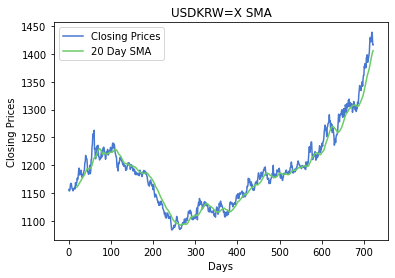

In [374]:
# bollinger bands
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

def get_sma(prices, rate):
    return prices.rolling(rate).mean()
    



symbol = 'USDKRW=X'
df = pdr.DataReader(symbol, 'yahoo', '2020-01-01', '2022-10-06') # <-- Get price data for stock from date range
df.index = np.arange(df.shape[0]) # Convert the index to array from [0, 1, 2, ...number of rows]
closing_prices = df['Close'] # Use only closing prices

sma = get_sma(closing_prices, 20) # Get 20 day SMA

# Plot the data
plt.title(symbol + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

In [375]:
def get_bollinger_bands(prices, rate=20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

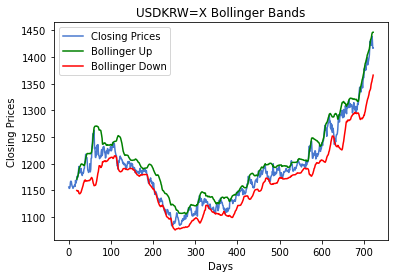

In [376]:
plt.title(symbol + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

In [377]:
# backtrading for bollinger bands
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
bollinger_up, bollinger_down = get_bollinger_bands(price['Close'])

for i in range(1, len(price)):
    if bollinger_down[i]:
        if price['Close'][i] < bollinger_down[i] and numb==0:
            buy = price['Close'][i]
            numb = money//buy
            money-=numb*buy
        elif price['Close'][i] > bollinger_up[i] and numb!=0:
            sell = price['Close'][i]
            money += (sell)*numb
            exchange +=1
            if sell>buy:
                wins +=1
            numb=0
        else:
            asset.append(money + (price['Close'][i]*numb))
            continue
    else:
        asset.append(money + (price['Close'][i]*numb))
        continue
    asset.append(money + (price['Close'][i]*numb))



In [378]:
asset

[10000,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 9478.8173828125,
 9442.7890625,
 9330.75,
 9257.8037109375,
 9220.7490234375,
 9527.96484375,
 9446.0810546875,
 9413.541015625,
 9737.0576171875,
 9780.8408203125,
 9568.2490234375,
 8766.4111328125,
 8581.939453125,
 8568.0244140625,
 8569.72509765625,
 5629.0830078125,
 6222.001953125,
 5858.6611328125,
 6050.60986328125,
 5672.77490234375,
 5883.92431640625,
 5896.7333984375,
 6849.48779296875,
 6857.0732421875,
 6843.36132

In [54]:
# profit calculation for MACD + bollinger band strategy
money = 10000
exchange = 0
wins= 0
asset = [10000]
numb=0
bollinger_up, bollinger_down = get_bollinger_bands(price['Open'])
for i in range(1, len(price)):
    if price['Long'][i] == True and bollinger_down[i]:
        
        if (price['Long'][i-1] ==False or (price['Open'][i]-bollinger_down[i])<(bollinger_up[i]-price['Open'][i])) and numb==0:
            print('hey')
            buy = price['Open'][i]
            numb = money//buy
            money-=numb*buy
        else:
            asset.append(money + (price['Open'][i]*numb))
            continue
    else:
        if price['Long'][i-1] == True and bollinger_up[i]:
            if (price['Open'][i]-bollinger_down[i])>(bollinger_up[i]-price['Open'][i]):
                sell = price['Open'][i]
                money += (sell)*numb
                exchange +=1
                if sell>buy:
                    wins +=1
                
                numb=0
        else: 
            
            asset.append(money + (price['Close'][i]*numb))
            continue
    asset.append(money + (price['Open'][i]*numb))
price['asset'] = asset


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


In [55]:
price['asset']

Date
2018-12-31    10000.000000
2019-01-02    10000.000000
2019-01-03     9296.304764
2019-01-04     9572.364685
2019-01-07     9551.079567
                  ...     
2021-12-27    52215.979588
2021-12-28    52215.979588
2021-12-29    52215.979588
2021-12-30    52215.979588
2021-12-31    52215.979588
Name: asset, Length: 758, dtype: float64

In [62]:
dates= pd.date_range(start = START, end=END).to_pydatetime().tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

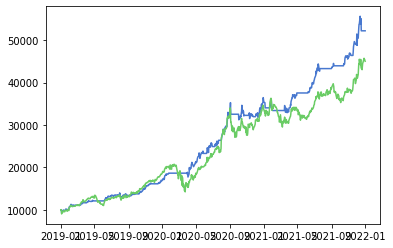

In [63]:
plt.plot(price['asset'])
plt.plot(price['Close']*(10000/price['Close'][0]))
plt.show  


In [64]:
#calculate system drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((price.Sys_DD / price.Sys_Peak).min() * 100, 2)

price.tail()

,High,Low,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,RSI_14,RSI_14_A_70,RSI_14_B_30,Long,Sys_Ret,Sys_Bal,apple,asset,Sys_Peak,Sys_DD
Date,,,,,,,,,,,,,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,1.022975,45728.412717,45728.412717,0.000000,66.890408,0,0,False,1.0,31849.164363,38981.491093,52215.979588,33395.655418,-1546.491054
2021-12-28,181.330002,178.529999,180.160004,179.289993,0.994233,45464.685443,45728.412717,-263.727275,64.950263,0,0,False,1.0,31849.164363,38981.491093,52215.979588,33395.655418,-1546.491054
2021-12-29,180.630005,178.139999,179.330002,179.380005,1.000502,45487.510748,45728.412717,-240.901969,65.044762,0,0,False,1.0,31849.164363,38981.491093,52215.979588,33395.655418,-1546.491054
2021-12-30,180.570007,178.089996,179.470001,178.199997,0.993422,45188.282171,45728.412717,-540.130546,62.659680,0,0,False,1.0,31849.164363,38981.491093,52215.979588,33395.655418,-1546.491054
2021-12-31,179.229996,177.259995,178.089996,177.570007,0.996465,45028.528247,45728.412717,-699.884471,61.365927,0,0,False,1.0,31849.164363,38981.491093,52215.979588,33395.655418,-1546.491054


In [65]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
sys_ret = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_ret}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')

Benchmark Total return: 350.29%
Benchmark CAGR: 65.11
Benchmark DD: -31.43%

System Total return: 218.49%
System CAGR: 47.12
System DD: -14.19%


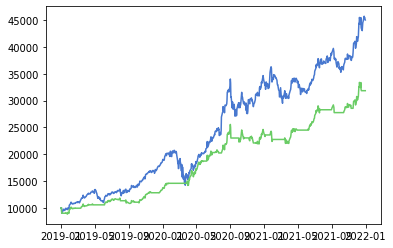

In [66]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal)

plt.show()


In [67]:
# Define our Lookback period (our sliding window)
window_length = 14
# Initialize containers for avg. gains and losses
gains = []
losses = []
# Create a container for current lookback prices
window = []
# Keeps track of previous average values
prev_avg_gain = None
prev_avg_loss = None
# Create a container for our final output (as a csv)
output = [['date', 'close', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rsi']]

In [68]:
(price['Close'])

Date
2018-12-31     39.435001
2019-01-02     39.480000
2019-01-03     35.547501
2019-01-04     37.064999
2019-01-07     36.982498
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: Close, Length: 758, dtype: float64

In [69]:
wilder_data = list(price['Close'])
for i, price in enumerate(wilder_data):
    # keep track of the price for the first period
    # but don't calculate a difference value.
    if i == 0:
        window.append(price)
        output.append([i+1, price, 0, 0, 0, 0, 0])
        continue
    # After the first period, calculate the difference
    # between price and previous price as a rounded value
    difference = round(wilder_data[i] - wilder_data[i - 1], 2)

In [70]:
# Record positive differences as gains
if difference > 0:
    gain = difference
    loss = 0

# Record negative differences as losses
elif difference < 0:
    gain = 0
    loss = abs(difference)

# Record no movements as neutral
else:
    gain = 0
    loss = 0

# Save gains/losses
gains.append(gain)
losses.append(loss)

# Continue to iterate until enough
# gains/losses data is available to 
# calculate the initial RS value
if i < window_length:
    window.append(price)
    output.append([i+1, price, gain, loss, 0, 0, 0])


In [223]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 9.0 MB/s eta 0:00:01
Using legacy 'setup.py install' for pandas-ta, since package 'wheel' is not installed.
    Running setup.py install for pandas-ta ... done
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [225]:
import pandas_ta as ta


In [71]:
# Calculate the RSI via pandas_ta
price.rsi(close='Close', length=14, append=True)
# View the result
print(df)

AttributeError: 'float' object has no attribute 'rsi'

In [8]:
import pandas as pd
import pandas_ta as ta
# Load the data
df = pd.read_csv('us_symbols.csv', header=0).set_index(['period'])
# Calculate the RSI via pandas_ta
df.ta.rsi(close='price', length=14, append=True, signal_indicators = True, xa=70, xb=30)
# View the result
print(df)

        price     RSI_14  RSI_14_A_70  RSI_14_B_30
period                                            
1       54.80        NaN            0            0
2       56.80        NaN            0            0
3       57.85        NaN            0            0
4       59.85        NaN            0            0
5       60.57        NaN            0            0
6       61.10        NaN            0            0
7       62.17        NaN            0            0
8       60.60        NaN            0            0
9       62.35        NaN            0            0
10      62.15        NaN            0            0
11      62.35        NaN            0            0
12      61.45        NaN            0            0
13      62.80        NaN            0            0
14      61.37        NaN            0            0
15      62.50  68.701706            0            0
16      62.57  68.936534            0            0
17      60.80  57.241560            0            0
18      59.37  49.879205       

In [53]:
def donchian_test_strategy(stock, start, end, buy_days, sell_days,invest):
    data = pdr.get_data_yahoo(stock, start, end)
    df=data.Close.to_frame()
    df["highest"]=(df["Close"].rolling(window=buy_days).max()).shift()
    df["Buy"]=np.where(df["Close"].shift()>df["highest"].shift(),1,0)
    df["lowest"]=(df["Close"].rolling(window=sell_days).min()).shift()
    df["Sell"]=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)
    
    Buy_dates=[]
    Sell_dates=[]
    buys=[]
    sells=[]
    open_pos=False
    
    for i in range(len(df)):
        if df.Buy.iloc[i]:
            if open_pos==False:
                buys.append(i)
                open_pos=True
                Buy_dates.append(df.iloc[i].name)
        elif df.Sell.iloc[i]:
            if open_pos:
                sells.append(i)
                open_pos=False
                Sell_dates.append(df.iloc[i].name)
    
    if len(buys)>len(sells):
        buys.pop(-1)
        Buy_dates.pop(-1)
    
    check=pd.DataFrame({'buydate':Buy_dates,'selldate':Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})
    check["pnl_perc"]=(check.sellprice-check.buyprice)/check.buyprice
    check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
    
    profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values
    list_profits=(profits_perc+1).cumprod()
    net_returns_perc=(list_profits[-1]-1).round(3)*100
    
    inv_ret=invest*(profits_perc+1).cumprod()
    return_inv=inv_ret[-1]
    
    large_loss=profits_perc.min().round(3)*100
    large_profit=profits_perc.max().round(3)*100   
    
    return print("Returns perc= {}%".format(net_returns_perc)), print("Invested return= {}".format(return_inv)), print("Largest Loss= {}%".format(large_loss)), print("Largest Profit= {}%".format(large_profit))

In [58]:
START = datetime.datetime(2018, 9, 25)
END = datetime.datetime(2022, 9, 25)
donchian_test_strategy("TSLA", START, END, 20, 40, 1000)

Returns perc= 348.3%
Invested return= 4482.830713026501
Largest Loss= -26.400000000000002%
Largest Profit= 377.3%


(None, None, None, None)

In [58]:
def donchian_test_strategy_return(stock, start, end, buy_days, sell_days,invest):
    data = pdr.get_data_yahoo(stock, start, end)
    df=data.Close.to_frame()
    df["highest"]=(df["Close"].rolling(window=buy_days).max()).shift()
    df["Buy"]=np.where(df["Close"].shift()>df["highest"].shift(),1,0)
    df["lowest"]=(df["Close"].rolling(window=sell_days).min()).shift()
    df["Sell"]=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)
    
    Buy_dates=[]
    Sell_dates=[]
    buys=[]
    sells=[]
    open_pos=False
    
    for i in range(len(df)):
        if df.Buy.iloc[i]:
            if open_pos==False:
                buys.append(i)
                open_pos=True
                Buy_dates.append(df.iloc[i].name)
        elif df.Sell.iloc[i]:
            if open_pos:
                sells.append(i)
                open_pos=False
                Sell_dates.append(df.iloc[i].name)
    
    if len(buys)>len(sells):
        buys.pop(-1)
        Buy_dates.pop(-1)
    
    check=pd.DataFrame({'buydate':Buy_dates,'selldate':Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})
    check["pnl_perc"]=(check.sellprice-check.buyprice)/check.buyprice
    check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
    
    profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values
    list_profits=(profits_perc+1).cumprod()
    net_returns_perc=(list_profits[-1]-1).round(3)*100
    
    inv_ret=invest*(profits_perc+1).cumprod()
    return_inv=inv_ret[-1]
    
    large_loss=profits_perc.min().round(3)*100
    large_profit=profits_perc.max().round(3)*100   
    
    return net_returns_perc

In [59]:
return_percents=[]
for i in range(len(symbols)):
    return_perc= donchian_test_strategy_return(symbols[i], START, END, 20, 40, 1000)
    return_percents.append(return_perc)
    

In [60]:
sum(return_percents)/len(return_percents)

106.22666666666666

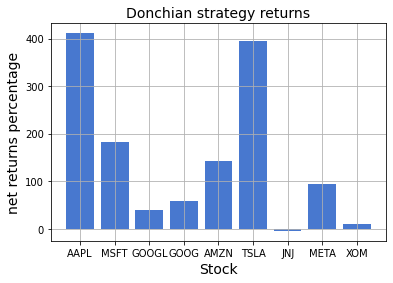

In [61]:

plt.bar(symbols[0:9], return_percents[0:9])
plt.title('Donchian strategy returns',fontsize=14)
plt.xlabel('Stock',fontsize=14)
plt.ylabel('net returns percentage',fontsize=14)
plt.grid(True)
plt.show()

In [114]:
pip install wordcloud

     |████████████████████████████████| 160 kB 9.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 8.7 MB 7.4 MB/s eta 0:00:01     |████▍                           | 1.2 MB 7.4 MB/s eta 0:00:02
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [117]:
pip install tweepy

     |████████████████████████████████| 94 kB 2.2 MB/s eta 0:00:01
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
     |████████████████████████████████| 151 kB 13.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [116]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [123]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1010251,4,1880983042,Fri May 22 03:11:26 PDT 2009,NO_QUERY,P_Diamond,Morning All! Beautiful day here despite the we...
493078,0,2184483377,Mon Jun 15 15:58:44 PDT 2009,NO_QUERY,Fuego,@mizrik omg it was exactly the same with my gr...
1555418,4,2185123466,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,Spike_Dennis,@lisaheleddjones Ooh! That sounds like a plan!...
1203856,4,1986151534,Sun May 31 18:24:16 PDT 2009,NO_QUERY,StaceyMelissa,Yay Twilight won
93548,0,1770707473,Mon May 11 22:01:50 PDT 2009,NO_QUERY,fille_a_plumes,charlie has been sleeping a lot but he keeps w...


In [124]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [125]:
print('length of data is', len(df))

length of data is 1600000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [131]:
df['target'].unique()

array([0, 4])

In [135]:
# import tweepy
import tweepy as tw

# your Twitter API key and API secret
my_api_key = "Q2O83kwrvrwo9Z2bG6e78XuWl"
my_api_secret = "mWEi7ZFCKnUBgt4F1MbzAqsosqVIbyJqYmEsrak2rL6SKhdMjm"

# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [160]:
client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAALJAhQEAAAAAleTaNg8DABUAtXM%2FRP9Ettv7hE0%3D2INgG0GJ4WWZxGqSCHDtbvYPj5dHHBezoTkXKpwmbLpkp5oPdq')

# Replace with your own search query
query = 'from:suhemparack -is:retweet'

tweets = client.search_all_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100)

for tweet in tweets.data:
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)

Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [136]:
search_query = "#covid19 -filter:retweets"

In [164]:
client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAALJAhQEAAAAAleTaNg8DABUAtXM%2FRP9Ettv7hE0%3D2INgG0GJ4WWZxGqSCHDtbvYPj5dHHBezoTkXKpwmbLpkp5oPdq')

# Replace with your own search query
query = 'Tesla -is:retweet'
tweets = []
# Replace with time period of your choice
start_time = '2020-01-01T00:00:00Z'

# Replace with time period of your choice
end_time = '2020-08-01T00:00:00Z'
# Replace the limit=1000 with the maximum number of Tweets you want
for tweet in tw.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'],  max_results=100).flatten(limit=1000):
    tweets.append(tweet.text)
print(tweets)

['🇺🇸 NEW 22 M3 LR in Black/White/18 with 3 Miles in Schaumburg, IL, US for $60,490 (w/FSD: $75,490) 🚩 Reserve @ https://t.co/XKRwlBVaOR &amp; Details @ https://t.co/xF4TkoWYO4', '🇺🇸 NEW 22 M3 LR in Gray/White/18 with 3 Miles in Chicago, IL, US for $58,990 🚩 Reserve @ https://t.co/WY9tqwrxkG &amp; Details @ https://t.co/3z3mvdk8rs', '🇺🇸 NEW 22 MX PLAID in White/White/22 with 8 Miles in Mesa, AZ, US for $146,490 (w/FSD: $161,490) 🚩 Reserve @ https://t.co/PDLX775BXd &amp; Details @ https://t.co/3KwCKtmO1a', '🇺🇸 NEW 22 MX PLAID in Black/White/22 with 7 Miles in LIBERTY LAKE, WA, US for $147,990 🚩 Reserve @ https://t.co/Aavnygllp4 &amp; Details @ https://t.co/TZPjVZhs98', '🇺🇸 NEW 22 MY PERF in Silver/White/21 with 1 Miles &amp; EAP in Lynnwood, WA, US for $77,990 🚩 Reserve @ https://t.co/UThxnoj8bk &amp; Details @ https://t.co/9h8ocQNCVn', 'New M3 2022 Long Range AWD in Westmont IL US listed at 58990 AP https://t.co/AnJR1eryp1', '@GordonJohnson19 @elonmusk Maybe, just maybe hertz is buying 

In [153]:
len(tweets)

1000

In [147]:
client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAALJAhQEAAAAAleTaNg8DABUAtXM%2FRP9Ettv7hE0%3D2INgG0GJ4WWZxGqSCHDtbvYPj5dHHBezoTkXKpwmbLpkp5oPdq')

# Replace with your own search query
query = '#covid19'

tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100)

for tweet in tweets.data:
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)

RT @rpCov19mx: 📰 Reporte Diario #COVID19 - #CDMX

Al 20 de septiembre del 2022, se registraron:

🔴 1,735,024 #confirmados (+406)
🟢 2,121 #a…
[{'domain': {'id': '123', 'name': 'Ongoing News Story', 'description': "Ongoing News Stories like 'Brexit'"}, 'entity': {'id': '1220701888179359745', 'name': 'COVID-19'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy view into the Semantic Core knowledge graph'}, 'entity': {'id': '1220701888179359745', 'name': 'COVID-19'}}]
Pour commander 👇
https://t.co/5up8DrojZK
Télégramme 👉 https://t.co/lPQaROtTJE
#France #Mckinseygate #Veran #occitanie #Toulouse #Montpellier #Herault #Beziers #Gard #nimes #perpignan #COVID #Ukraine #Paris #BillGatesBioTerrorist #Zelensky #COVID19 https://t.co/OfUssjC5t5
[{'domain': {'id': '10', 'name': 'Person', 'description': 'Named people in the world like Nelson Mandela'}, 'entity': {'id': '1483773221681844225', 'name': 'Olivier Véran'}}, {'domain': {'id': '10', 'name': 'Person', '

In [143]:
len(tweet.context_annotations)

7

In [138]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              start_time="2020-09-16").items(50)

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: start_time


Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

In [214]:
import pandas_datareader as pdr
import datetime 
from matplotlib import pyplot as pyplot
import numpy as np
%matplotlib inline

In [215]:
START = datetime.datetime(2017,1,1)
END = datetime.datetime(2020,1,1)
YEARS = (END-START).days / 365.25

In [216]:
STARTING_BALANCE = 10000

In [217]:
price = pdr.get_data_yahoo('^GSPC', START, END)
price

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902
...,...,...,...,...,...,...
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020


In [2]:
pip install twarc

     |████████████████████████████████| 60 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 9.3 MB/s eta 0:00:01
Using legacy 'setup.py install' for configobj, since package 'wheel' is not installed.
    Running setup.py install for configobj ... done
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
datetime.datetime(2021, 3, 21, 0, 0, 0, 0)

NameError: name 'datetime' is not defined

In [13]:
from twarc.client2 import Twarc2
from twarc.expansions import ensure_flattened

# Your bearer token here
t = Twarc2(bearer_token="AAAAAAAAAAAAAAAAAAAAALJAhQEAAAAAleTaNg8DABUAtXM%2FRP9Ettv7hE0%3D2INgG0GJ4WWZxGqSCHDtbvYPj5dHHBezoTkXKpwmbLpkp5oPdq")

# Start and end times must be in UTC
start_time = datetime.datetime(2021, 3, 21, 0, 0, 0, 0, datetime.timezone.utc)
end_time = datetime.datetime(2021, 3, 22, 0, 0, 0, 0, datetime.timezone.utc)

# search_results is a generator, max_results is max tweets per page, 500 max for full archive search.
search_results = t.search_all(query="dogs lang:en -is:retweet", start_time=start_time, end_time=end_time, max_results=10)

# Get all results page by page:
for page in search_results:
    # Do something with the whole page of results:
    # print(page)
    # or alternatively, "flatten" results returning 1 tweet at a time, with expansions inline:
    for tweet in ensure_flattened(page):
        # Do something with the tweet
        print(tweet)
    # Stop iteration prematurely, to only get 1 page of results.
    break

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'datetime' is not defined

In [3]:
pip install newsapi-python

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='f8a45fa6639a45dc99a6d737c9405dc0')


# /v2/top-headlines/sources
sources = newsapi.get_sources()

In [10]:
sources

{'status': 'ok',
 'sources': [{'id': 'abc-news',
   'name': 'ABC News',
   'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
   'url': 'https://abcnews.go.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'abc-news-au',
   'name': 'ABC News (AU)',
   'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
   'url': 'http://www.abc.net.au/news',
   'category': 'general',
   'language': 'en',
   'country': 'au'},
  {'id': 'aftenposten',
   'name': 'Aftenposten',
   'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.',
   'url': 'https://www.aftenposten.no',
   'category': 'general',
   'language': 'no',
   'country': 'no'},
  {'id': 'al-jazeera-english',
   'name': 'Al Jazeera English',
   'descr

In [12]:
# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          sources='bbc-news,the-verge',
                                          category='business',
                                          language='en',
                                          country='us')

# /v2/everything
all_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2017-12-01',
                                      to='2017-12-12',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

NewsAPIException: {'status': 'error', 'code': 'parameterInvalid', 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2022-08-25, but you have requested 2017-12-01. You may need to upgrade to a paid plan.'}